# **Webscraping Project - EvoAstra**

## Importing Libraries

In [3]:
import requests
import pandas as pd 
import os 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

## Configuration

In [4]:
NUM_PAGES = 5
OUTPUT_FILE = "remote_jobs1.csv"

# RemoteOK API configuration
REMOTEOK_API_URL = "https://remoteok.com/api"

# Headers to avoid being blocked
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

In [5]:
# Fetch data from RemoteOK API
print("Fetching data from RemoteOK API...")

response = requests.get(REMOTEOK_API_URL, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    print("Success! Downloaded the data from API.")
    print(f"Total jobs available: {len(response.json())}")
else:
    print(f"Error: {response.status_code}")

# Print first 500 characters of the response
print(response.text[:500])

Fetching data from RemoteOK API...
Success! Downloaded the data from API.
Total jobs available: 99
[{"last_updated":1772312414,"legal":"API Terms of Service: Please link back (with follow, and without nofollow!) to the URL on Remote OK and mention Remote OK as a source, so we get traffic back from your site. If you do not we'll have to suspend API access.\n\nPlease don't use the Remote OK logo without written permission as it's a registered trademark, please DO use our name Remote OK though."},{"slug":"remote-technical-product-manager-arize-ai-1130568","id":"1130568","epoch":1772233220,"date"


## Scraping Data from API

In [6]:
jobs_data = []

# RemoteOK API returns a list of jobs (first item is usually a tag)
api_jobs = response.json()

# Skip the first item as it's typically a tag/label
for job in api_jobs[1:]:
    # Extract job details from API response
    job_data = {
        "Title": job.get("position", "N/A"),
        "Company": job.get("company", "N/A"),
        "Skills": ", ".join(job.get("tags", [])),
        "Location": job.get("location", "N/A"),
        "URL": f"https://remoteok.com/remote-jobs/{job.get('id', '')}"
    }
    jobs_data.append(job_data)

print(f"\nTotal jobs scraped: {len(jobs_data)}")


Total jobs scraped: 98


## Save Data

In [ ]:
# Create DataFrame
df = pd.DataFrame(jobs_data)

# Display first 10 jobs
print("\n--- First 10 Jobs ---")
print(df.head(10).to_string(index=False))



# Save to CSV
output_path = os.path.join(os.path.dirname(__file__), OUTPUT_FILE) if "__file__" in dir() else OUTPUT_FILE
df.to_csv(output_path, index=False)
print(f"\nData saved to {output_path}")


--- First 10 Jobs ---
                                                Title               Company                                                                                                               Skills      Location                                      URL
                            Technical Product Manager              Arize AI                                                                               manager, technical, voice, engineering               https://remoteok.com/remote-jobs/1130568
Middle Project Manager Internal Systems and Processes                INFUSE                                                                     manager, security, test, video, lead, recruiting               https://remoteok.com/remote-jobs/1130567
    Early Career Software Engineer Warfighter Systems    Anduril Industries software, system, security, python, 3d, training, game, gaming, docker, technical, code, java, operational, engineer      Bellevue https://remoteok.com/remot

## Reading New Saved Data

In [8]:
df = pd.read_csv(r"C:\Users\Akshay\Desktop\EvoAstra\Web_Scraping_EvoAstra\Data\raw\remote_jobs.csv")
df.head(10)

,Title,Company,Skills,Location,URL
0,Senior Software Engineer Prime,Alpaca,"software, crypto, system, frontend, growth, co...",NaN,https://remoteok.com/remote-jobs/1130563
1,Technical Writer,Allen Control Systems,"embedded, system, technical, writer, support, ...",NaN,https://remoteok.com/remote-jobs/1130562
2,Lead VFX Artist,Insomniac Games,"vfx, game, technical, support, test, managemen...",United States,https://remoteok.com/remote-jobs/1130561
3,Senior Facial Character TD,Insomniac Games,"3d, support, animation, senior, engineering",United States,https://remoteok.com/remote-jobs/1130560
4,Social Media Video Creator Intern,Cathoven,"students, ielts, video, education, content, in...",Turkey,https://remoteok.com/remote-jobs/1130559
5,AI Engineer I,Sezzle,"growth, fintech, senior, operational, sales, e...",India,https://remoteok.com/remote-jobs/1130557
6,Senior Security Engineer,Nansen.ai,"security, design, support, developer, code, cl...",NaN,https://remoteok.com/remote-jobs/1130555
7,Product Engineer,Fronted AS,"engineer, product, front end",NaN,https://remoteok.com/remote-jobs/1130554
8,Senior 3D Artist Monopoly GO,Scopely,"3d, technical, support, mobile, lead, senior, go",Culver City,https://remoteok.com/remote-jobs/1130551
9,Senior User Experience Designer,Virtru,"security, designer, ux, senior, android, engin...",Remote,https://remoteok.com/remote-jobs/1130547


## Droping Unnecssary Columns

In [9]:
df.drop(columns=["URL"], inplace=True)
df.head(10)

,Title,Company,Skills,Location
0,Senior Software Engineer Prime,Alpaca,"software, crypto, system, frontend, growth, co...",NaN
1,Technical Writer,Allen Control Systems,"embedded, system, technical, writer, support, ...",NaN
2,Lead VFX Artist,Insomniac Games,"vfx, game, technical, support, test, managemen...",United States
3,Senior Facial Character TD,Insomniac Games,"3d, support, animation, senior, engineering",United States
4,Social Media Video Creator Intern,Cathoven,"students, ielts, video, education, content, in...",Turkey
5,AI Engineer I,Sezzle,"growth, fintech, senior, operational, sales, e...",India
6,Senior Security Engineer,Nansen.ai,"security, design, support, developer, code, cl...",NaN
7,Product Engineer,Fronted AS,"engineer, product, front end",NaN
8,Senior 3D Artist Monopoly GO,Scopely,"3d, technical, support, mobile, lead, senior, go",Culver City
9,Senior User Experience Designer,Virtru,"security, designer, ux, senior, android, engin...",Remote


## Data Cleaning

In [10]:
# Display basic info
print(f"Total rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nMissing values:\n{df.isnull().sum()}")

Total rows: 98
Columns: ['Title', 'Company', 'Skills', 'Location']

Missing values:
Title        3
Company      5
Skills       2
Location    35
dtype: int64


In [11]:
# Remove rows where critical fields are missing
df = df[df['Title'] != 'N/A']
df = df[df['Company'] != 'N/A']

In [12]:
# Remove duplicates (based on title + company + url)
df = df.drop_duplicates(subset=['Title', 'Company'])

In [13]:
# Clean text: lowercase titles and companies
df['Title'] = df['Title'].str.lower()
df['Company'] = df['Company'].str.lower()

In [ ]:
# Save to CSV
df.to_csv('remoteok_jobs_cleaned.csv', index=False)

In [15]:
# Reading The Cleaned Data
df = pd.read_csv(r"C:\Users\Akshay\Desktop\EvoAstra\Web_Scraping_EvoAstra\Data\cleaned\remoteok_jobs_cleaned.csv")
df.head(10)

,Title,Company,Skills,Location
0,senior software engineer prime,alpaca,"software, crypto, system, frontend, growth, co...",NaN
1,technical writer,allen control systems,"embedded, system, technical, writer, support, ...",NaN
2,lead vfx artist,insomniac games,"vfx, game, technical, support, test, managemen...",United States
3,senior facial character td,insomniac games,"3d, support, animation, senior, engineering",United States
4,social media video creator intern,cathoven,"students, ielts, video, education, content, in...",Turkey
5,ai engineer i,sezzle,"growth, fintech, senior, operational, sales, e...",India
6,senior security engineer,nansen.ai,"security, design, support, developer, code, cl...",NaN
7,product engineer,fronted as,"engineer, product, front end",NaN
8,senior 3d artist monopoly go,scopely,"3d, technical, support, mobile, lead, senior, go",Culver City
9,senior user experience designer,virtru,"security, designer, ux, senior, android, engin...",Remote


## Analysis Of The Data (Explotory Data Analysis)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     95 non-null     object
 1   Company   93 non-null     object
 2   Skills    96 non-null     object
 3   Location  63 non-null     object
dtypes: object(4)
memory usage: 3.1+ KB


In [17]:
df.describe()

,Title,Company,Skills,Location
count,95,93,96,63
unique,93,87,96,39
top,senior security engineer,ci&amp;t,"software, crypto, system, frontend, growth, co...",Remote
freq,2,3,1,10


In [18]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool

In [19]:
# Top 10 job titles
print("Top 10 Job Titles:")
job_title_counts = df['Title'].value_counts().head(10)
print(job_title_counts)

Top 10 Job Titles:
Title
senior security engineer             2
software engineer                    2
technical writer                     1
senior facial character td           1
lead vfx artist                      1
social media video creator intern    1
ai engineer i                        1
product engineer                     1
senior 3d artist monopoly go         1
senior user experience designer      1
Name: count, dtype: int64


In [20]:
# Top 10 skills
print("\nTop 10 Skills:")
# First, split the skills string and create individual rows
df_skills = df.copy()
df_skills['Skills'] = df_skills['Skills'].str.split(', ')
df_skills = df_skills.explode('Skills')
skill_counts = df_skills['Skills'].value_counts().head(10)
print(skill_counts)


Top 10 Skills:
Skills
support          32
technical        29
engineering      28
senior           27
growth           25
lead             25
engineer         23
digital nomad    22
manager          21
management       19
Name: count, dtype: int64


In [21]:
# Job type distribution
print("\nJob Type Distribution:")
print(df['Title'].value_counts())


Job Type Distribution:
Title
senior security engineer                        2
software engineer                               2
technical writer                                1
senior facial character td                      1
lead vfx artist                                 1
                                               ..
mid level devops engineer ci cd optimization    1
director asset protection nam retail            1
hr project coordinator                          1
senior account executive western europe         1
engineering manager delivery                    1
Name: count, Length: 93, dtype: int64


In [22]:
# Location distribution
print("\nTop Locations:")
print(df['Location'].value_counts().head(10))


Top Locations:
Location
Remote           10
United States     7
San Francisco     4
Brazil            3
Canada            2
Anywhere          2
India             2
Toronto           2
Any city          1
Turkey            1
Name: count, dtype: int64


In [23]:
# Top companies
print("\nTop 10 Companies:")
print(df['Company'].value_counts().head(10))


Top 10 Companies:
Company
ci&amp;t           3
okta, inc.         2
insomniac games    2
solera health      2
goal uganda        2
cathoven           1
alpaca             1
fronted as         1
scopely            1
vrchat             1
Name: count, dtype: int64


## Visualizing The Data

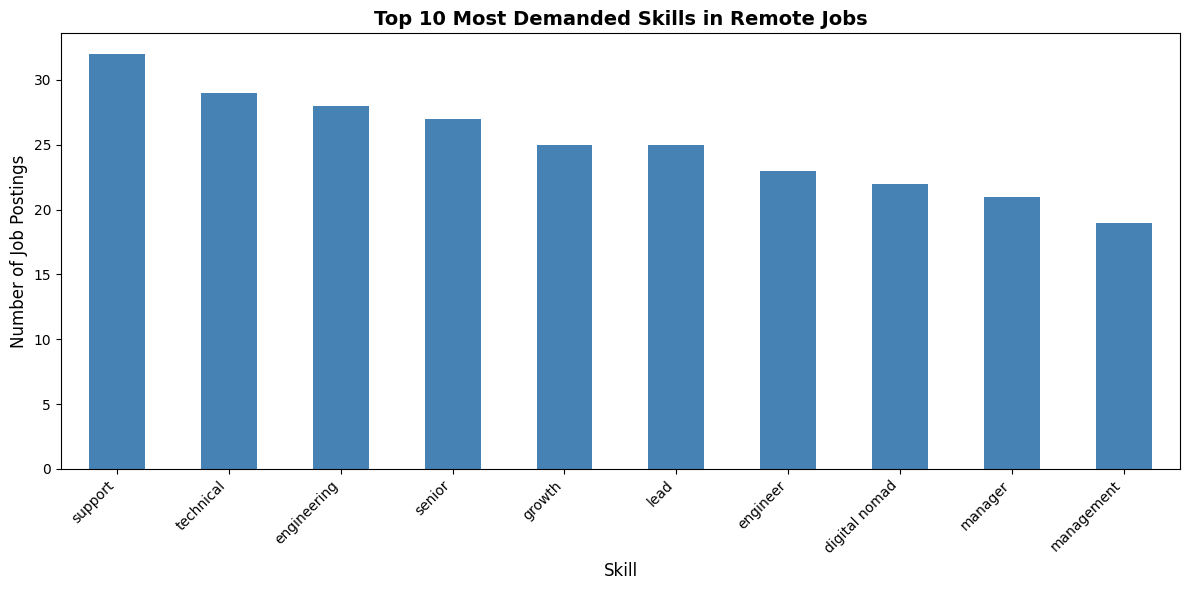

In [24]:
# Create bar chart
top_skills = df_skills['Skills'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_skills.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Demanded Skills in Remote Jobs', fontsize=14, fontweight='bold')
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_skills.png', dpi=300)
plt.show()

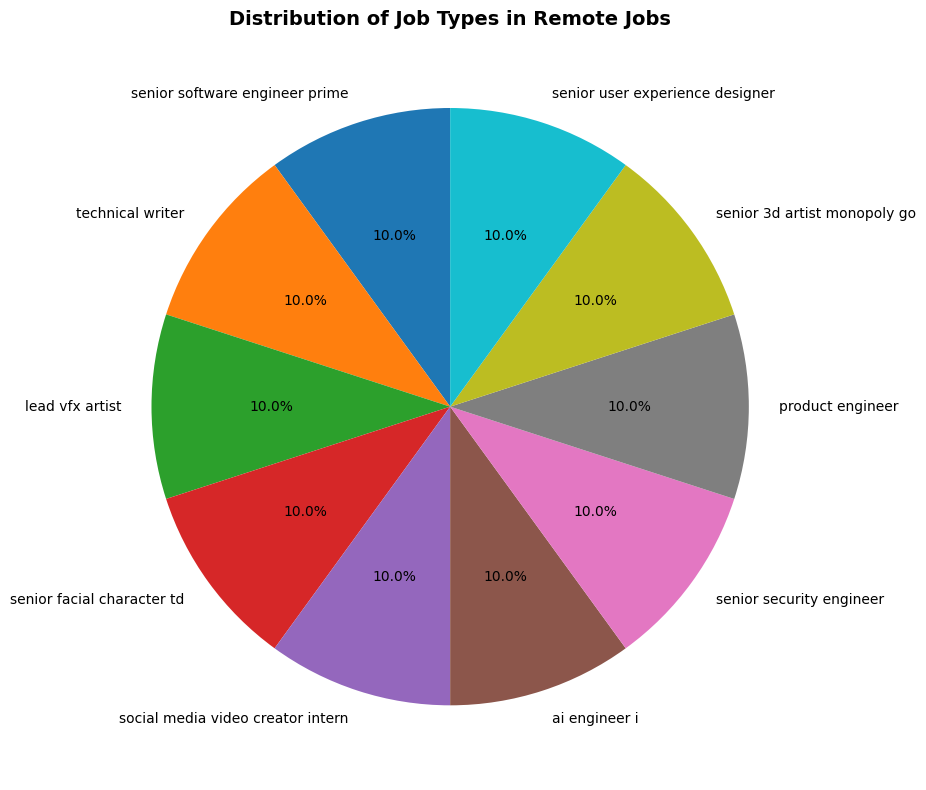

In [25]:
# Count job types
job_type_counts = df['Title'].head(10).value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Types in Remote Jobs', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('job_type_distribution.png', dpi=300)
plt.show()

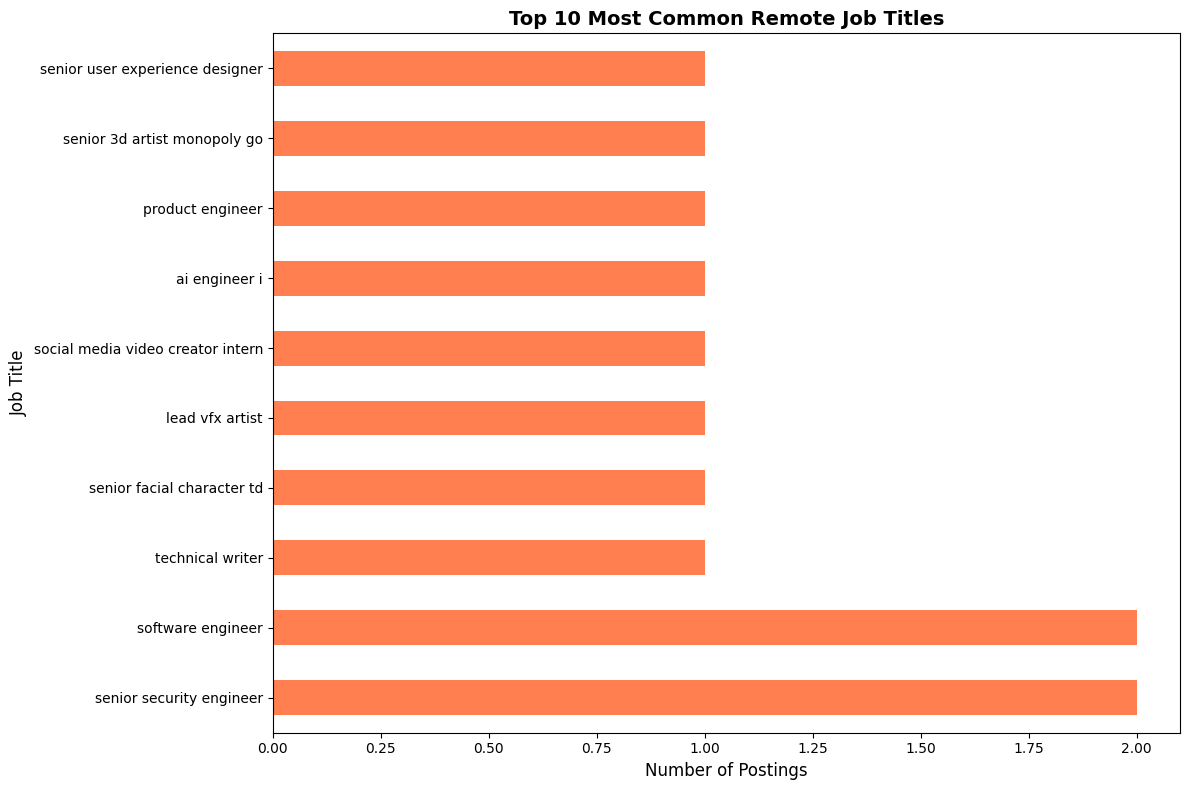

In [26]:
# Get top 10 job titles
top_titles = df['Title'].value_counts().head(10)

# Create horizontal bar chart (easier to read long titles)
plt.figure(figsize=(12, 8))
top_titles.plot(kind='barh', color='coral')
plt.title('Top 10 Most Common Remote Job Titles', fontsize=14, fontweight='bold')
plt.xlabel('Number of Postings', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()
plt.savefig('top_job_titles.png', dpi=300)
plt.show()

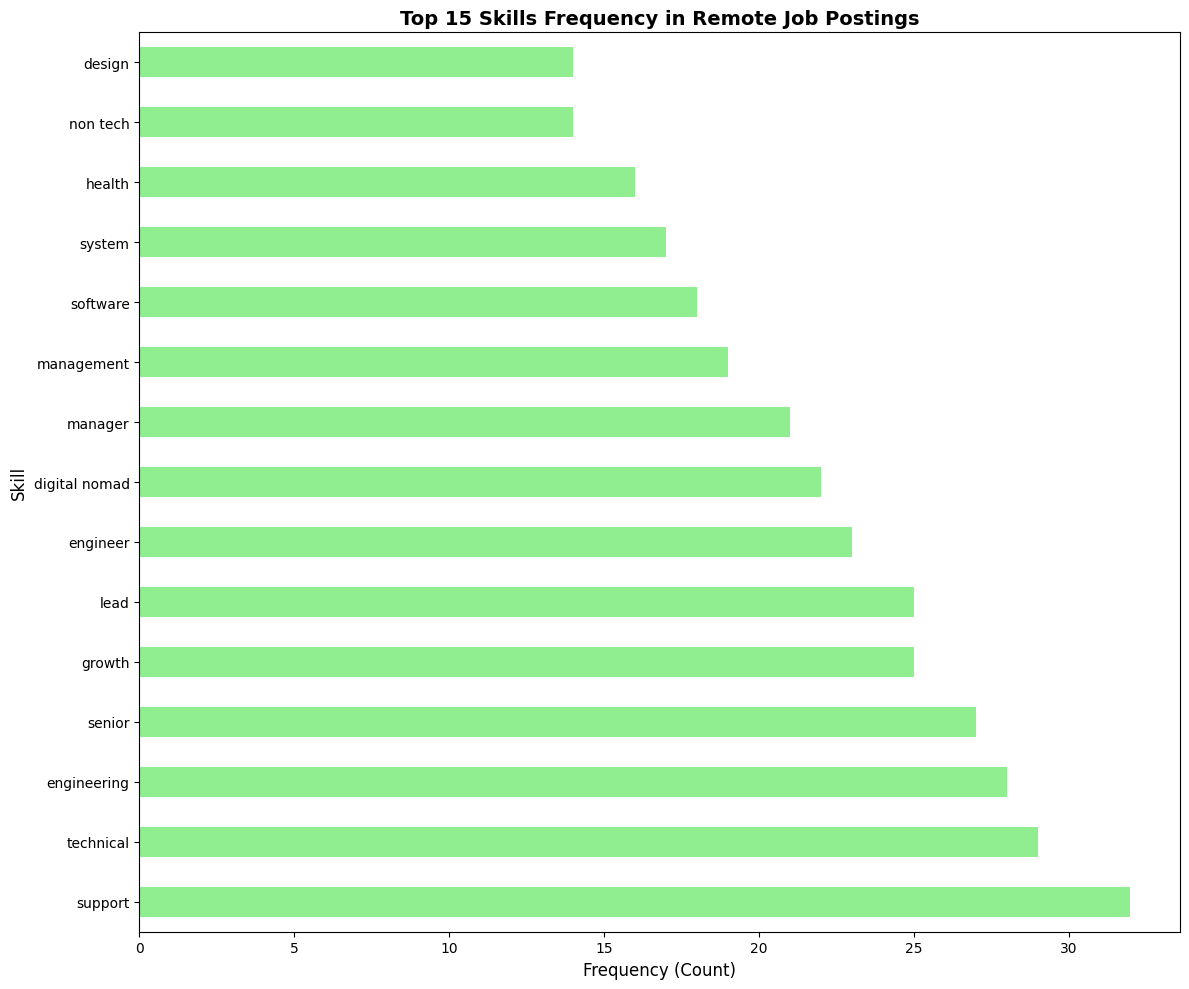

In [27]:
# Get top 15 skills for more detail
top_skills_extended = df_skills['Skills'].value_counts().head(15)

# Create horizontal bar chart
plt.figure(figsize=(12, 10))
top_skills_extended.plot(kind='barh', color='lightgreen')
plt.title('Top 15 Skills Frequency in Remote Job Postings', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Count)', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.tight_layout()
plt.savefig('skill_frequency_comparison.png', dpi=300)
plt.show()

In [28]:
# Get top 3 job titles
top_3_titles = df['Title'].value_counts().head(3).index.tolist()

for title in top_3_titles:
    title_jobs = df[df['Title'] == title].copy()
    title_skills = title_jobs.copy()
    title_skills['Skills'] = title_skills['Skills'].str.split(', ')
    title_skills = title_skills.explode('Skills')
    
    print(f"\nTop skills for '{title}':")
    print(title_skills['Skills'].value_counts().head(5))


Top skills for 'senior security engineer':
Skills
security       2
senior         2
engineer       2
engineering    2
support        1
Name: count, dtype: int64

Top skills for 'software engineer':
Skills
software       2
code           2
engineer       2
engineering    2
finance        1
Name: count, dtype: int64

Top skills for 'technical writer':
Skills
embedded     1
system       1
technical    1
writer       1
support      1
Name: count, dtype: int64


In [30]:
location_counts = df['Location'].value_counts()
location_percentages = (location_counts / len(df) * 100).round(2)

print("Top Locations for Remote Jobs:")
for location, count in location_counts.head(10).items():
    percentage = location_percentages[location]
    print(f"{location}: {count} jobs ({percentage}%)")

# Check if dominated by specific region
top_5_percentage = location_percentages.head(5).sum().round(2)
print(f"\nTop 5 locations account for {top_5_percentage}% of all jobs")

Top Locations for Remote Jobs:
Remote: 10 jobs (10.42%)
United States: 7 jobs (7.29%)
San Francisco: 4 jobs (4.17%)
Brazil: 3 jobs (3.12%)
Canada: 2 jobs (2.08%)
Anywhere: 2 jobs (2.08%)
India: 2 jobs (2.08%)
Toronto: 2 jobs (2.08%)
Any city: 1 jobs (1.04%)
Turkey: 1 jobs (1.04%)

Top 5 locations account for 27.08% of all jobs
